In [1]:
from tensorflow.keras import datasets
from keras.utils import np_utils

In [2]:
(x_tr, y_tr), (x_ts, y_ts) = datasets.mnist.load_data()
print(y_tr[:5])

[5 0 4 1 9]


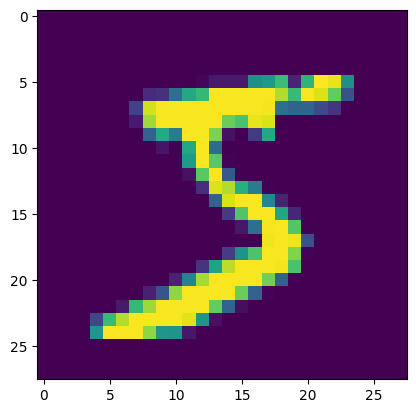

In [13]:
plt.imshow(x_tr[0].reshape(28,28))
plt.show()

In [14]:
y_tr[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [3]:
# one-hot encoding
y_tr = np_utils.to_categorical(y_tr)
print(y_tr[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [4]:
y_ts = np_utils.to_categorical(y_ts)

In [5]:
x_tr.shape

(60000, 28, 28)

In [6]:
L, W, H = x_tr.shape

In [8]:
# -1 sample 개수
x_tr = x_tr.reshape(-1, W*H)     # 2차원으로 변경, 28x28 = 768
x_ts = x_ts.reshape(-1, W*H)
x_tr = x_tr / 255.0
x_ts = x_ts / 255.0

In [9]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

# 분류 DNN모델 구현 함수
def make_model(input_number, layers, output_number):
    # 모델초기화
    model = Sequential()
    model.add(Dense(layers[0], activation='relu', input_shape=(input_number,)))
    model.add(Dense(layers[1], activation='relu'))
    model.add(Dense(layers[2], activation='relu'))

    # 드롭아웃
    model.add(Dropout(0.2))

    # 출력
    model.add(Dense(output_number, activation='softmax', name='output'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

input_number = 784
hidden_layers = [128, 64, 32]
print(hidden_layers)
number_of_class = 10
output_number = number_of_class

# 모델생성
model = make_model(input_number, hidden_layers, output_number)

[128, 64, 32]


In [10]:
hist = model.fit(x_tr, y_tr, epochs=5, batch_size=128, validation_split=0.2)

# 모델평가
model.evaluate(x_ts, y_ts, batch_size=128)


Epoch 1/5
375/375 [==============================] - 4s 5ms/step - loss: 0.4678 - accuracy: 0.8623 - val_loss: 0.1738 - val_accuracy: 0.9505
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 0.1916 - accuracy: 0.9459 - val_loss: 0.1276 - val_accuracy: 0.9622
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.1351 - accuracy: 0.9614 - val_loss: 0.1185 - val_accuracy: 0.9647
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 0.1038 - accuracy: 0.9699 - val_loss: 0.1065 - val_accuracy: 0.9698
Epoch 5/5
79/79 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9737


[0.0906970202922821, 0.9736999869346619]

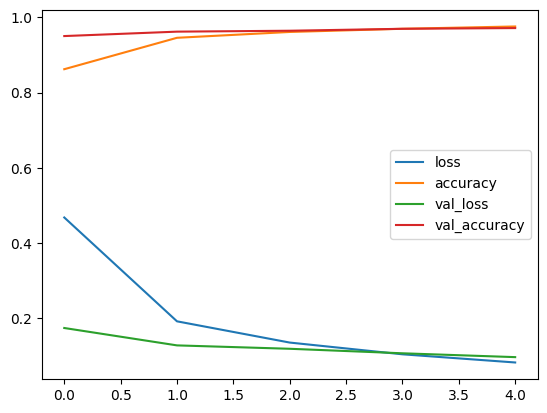

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.show()

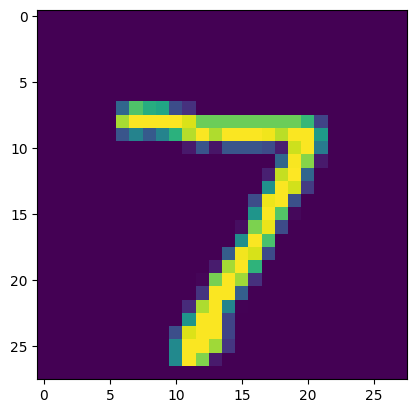

In [17]:
plt.imshow(x_ts[0].reshape(28,28))
plt.show()

In [22]:
model.predict(x_ts)[0]

313/313 [==============================] - 1s 2ms/step


array([4.1028311e-06, 1.4671630e-07, 2.1884541e-06, 1.2516497e-04,
       2.8942768e-08, 1.8821758e-07, 6.7267485e-09, 9.9985409e-01,
       3.2099283e-07, 1.3699443e-05], dtype=float32)

In [26]:
import numpy as np
np.argmax(model.predict(x_ts)[0])

313/313 [==============================] - 1s 2ms/step


7